# Scikit-learn with the Wine Dataset
# TASK 3.1P


# *This notebook demonstrates machine learning fundamentals using Scikit-learn, with all examples utilizing the Wine dataset.*

# STEP 1: Importing the libraries

---


First we need to import the necessary libraries that will be used for further procession such as:

*   numpy is used for numerical operations
*   pandas is used for data manipulation
*   matplotlib and seaborn are used for data visualization
*   scikit-learn offers tools for machine learning
*   joblib is used for saving and loading the models to the disk



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import joblib
print("libraries imported!!")

libraries imported!!


# STEP 2: Loading the Dataset


---
To load this dataset, we use the function *load_wine()* which returns the features and target labels. In our case, we are using the built-in wine dataset

In [ ]:
wine = load_wine()

# Feature matrix
X = wine.data

# Target labels
y = wine.target


print("Features (X):")
print(X)
print("\nTarget labels (y):")
print(y)


Features (X):
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

Target labels (y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# STEP 3:  Data Preprocessing

---


Data preprocessing is a crucial step to prepare the data before feeding it into a model. Raw data is transformed into suitable formats which helps in improving machine learning accuracy and overall performance.
Here are the few steps that data pre-processing handles:

*   Handling missing data (imputing or removing),
*   Encoding categorical variables (if present)
*   Scaling features (standardization or normalization)

In our scenario, we are using Standardization to scale the features. We basically transform the data in a way that each feature has a mean of 0 and standard deviation of 1

In [ ]:

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Print scaled features
print("Scaled features (first 5 samples):")
print(X_scaled[:5])

Scaled features (first 5 samples):
[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


# STEP 4: Splitting the Data into Training and Test Sets


---


Splitting the dataset into training and testing sets is a crucial step after data preprocessing. It allows us to train our machine learning model on one part of the data and evaluate its performance on a separate portion.

The *train_test_split* funciton from scikit library is used to split the datasets into x and y variables
Here, we’ll split the dataset into 70% training and 30% testing:


In [ ]:
# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Print the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (124, 13)
X_test shape: (54, 13)
y_train shape: (124,)
y_test shape: (54,)


# STEP 5: Exploratory Data Analysis
In this we still we will find if any null value exsists in the train and test datasets. We will then visualize the correlation among the features and examine the key features to understand its charcaterstics.


Missing Values in Train Data:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

Missing Values in Test Data:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64


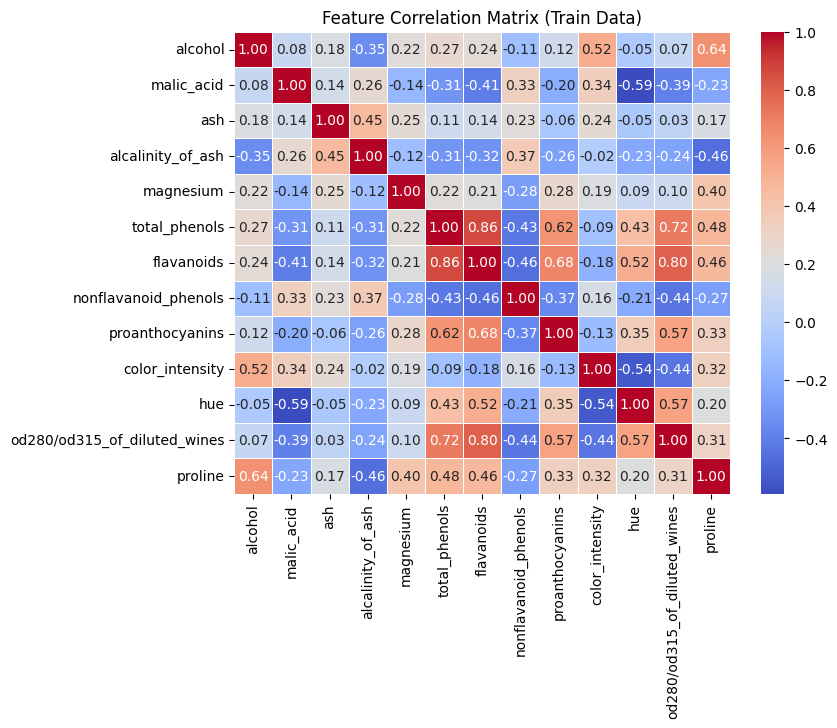

In [ ]:
#Performing Exploratory Data Analysis

#Check for missing values in the scaled dataset (train and test)
missing_values_train = pd.DataFrame(X_train).isnull().sum()
missing_values_test = pd.DataFrame(X_test).isnull().sum()

print("\nMissing Values in Train Data:")
print(missing_values_train)
print("\nMissing Values in Test Data:")
print(missing_values_test)

#Feature Correlation Heatmap (showing correlations between features)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(X_train, columns=wine.feature_names).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix (Train Data)")
plt.show()


After performing a quick data analaysis we can confirm that there are no null values exsisting in train and test datasets. The heatmap displayed strong relationship among the features. The data is clean and ready for Training

# STEP 5: Training a Classification Model


---


In this step, we train our machine learning model using the training dataset. Since, our dataset includes labelled variables we use supervised learning to train our model.

Scikit-learn offers various machine learning algorithms that can be used to achieve this. Here are some popular supervised learning aloghtrims that we will apply:


*   Logistic regression
*   K-Nearest Neighbors
*   Decision Tree
*   Support Vector Machine (SVM)





# Logistic Regression
Logistic regression is a supervised machine learning algorithm and a type of classification algorithm that predicts a discrete or categorical outcome


In [ ]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

# k-nearest neighbors
This is a type of supervised machine learning algorithm which is widely used for classification but can also be used for regression tasks. It finds the "k" closest data points to a given input and makes predictions based on the majority class.

In [ ]:
# # Initialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

#Decision Tree
A Decision Tree maps out different choices and their possible outcomes. It’s used in machine learning for tasks like classification and prediction.

In [ ]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree on the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier()

#Support Vector Machine
 A SVM tries to find the best boundary known as hyperplane that separates different classes in the data. It is widely used for mapping out binary classification like cat or dog.

In [ ]:
# Initialize the Support Vector Machine classifier
svm = SVC()

# Train the SVM model on the training data
svm.fit(X_train, y_train)


SVC()

# STEP 6: Evaluating the Models


---
It is a process that uses some metrics which help us to analyze the performance of the model. Some of the metrics that we will use to evaluate our trained model are accuracy, confusion matrix, and classification report.

# Logistic Regression Evaluation

In [ ]:
# Predict test labels using Logistic Regression model
y_pred_log = log_reg.predict(X_test)

# Calculate accuracy of the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# Show precision, recall, f1-score for each class
print("Classification Report:\n", classification_report(y_test, y_pred_log))




Logistic Regression Accuracy: 0.9814814814814815
Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# K-Nearest Neighbors (KNN) Evaluation

In [ ]:
# Predict test labels using KNN model
y_pred_knn = knn.predict(X_test)

# Calculate accuracy of KNN model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Display confusion matrix for KNN
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Show classification report for KNN
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9629629629629629
Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



# Decision Tree Evaluation

In [ ]:
# Predict test labels using Decision Tree model
y_pred_dt = dt.predict(X_test)

# Calculate accuracy of Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Display confusion matrix for Decision Tree
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Show classification report for Decision Tree
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9629629629629629
Confusion Matrix:
 [[18  1  0]
 [ 0 21  0]
 [ 0  1 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



# Support Vector Machine (SVM) Evaluation

In [ ]:
# Predict test labels using SVM model
y_pred_svm = svm.predict(X_test)

# Calculate accuracy of SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Display confusion matrix for SVM
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Show classification report for SVM
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9814814814814815
Confusion Matrix:
 [[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# LOGISTIC REGRESSION AND SVM HAD THE BEST ACCURACY OF 98.14%

# STEP 7: Cross-Validation


---


It is a technique used to check how well a machine learning model performs on unseen data. It splits the data into several parts, trains the model on some parts and tests it on the remaining part and repeats the whole process multiple times. In our case, we use 5-Fold Cross-Validation, where the data is split and the model is trained and tested 5 times.

Logistic Regression Cross-Validation Scores: [0.97222222 0.97222222 1.         1.         1.        ]
Average Accuracy: 0.9888888888888889 

KNN Cross-Validation Scores: [0.94444444 0.94444444 0.97222222 1.         0.91428571]
Average Accuracy: 0.9550793650793651 

Decision Tree Cross-Validation Scores: [0.94444444 0.83333333 0.88888889 0.91428571 0.85714286]
Average Accuracy: 0.8876190476190475 

SVM Cross-Validation Scores: [1.         0.97222222 0.94444444 1.         1.        ]
Average Accuracy: 0.9833333333333334


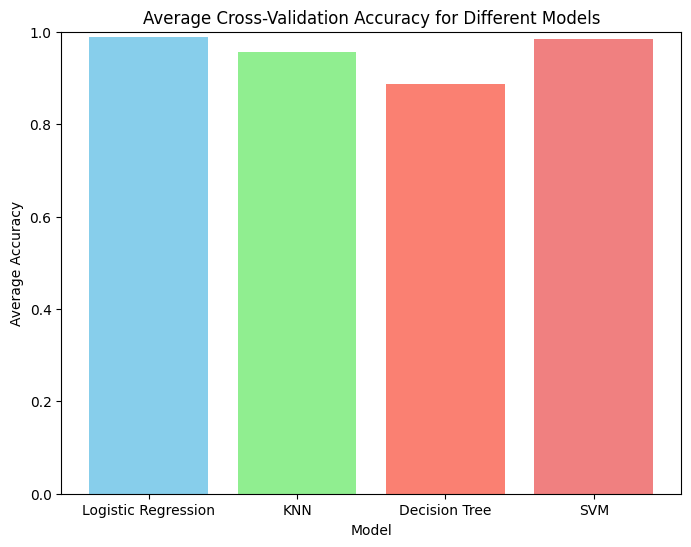

In [ ]:
# Logistic Regression Cross-Validation
log_cv = cross_val_score(log_reg, X_scaled, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", log_cv)
print("Average Accuracy:", log_cv.mean(), "\n")

# KNN Cross-Validation
knn_cv = cross_val_score(knn, X_scaled, y, cv=5)
print("KNN Cross-Validation Scores:", knn_cv)
print("Average Accuracy:", knn_cv.mean(), "\n")

# Decision Tree Cross-Validation
dt_cv = cross_val_score(dt, X_scaled, y, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_cv)
print("Average Accuracy:", dt_cv.mean(), "\n")

# SVM Cross-Validation
svm_cv = cross_val_score(svm, X_scaled, y, cv=5)
print("SVM Cross-Validation Scores:", svm_cv)
print("Average Accuracy:", svm_cv.mean())

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
cv_scores = [log_cv.mean(), knn_cv.mean(), dt_cv.mean(), svm_cv.mean()]

# Plotting the average accuracy per model
plt.figure(figsize=(8, 6))
plt.bar(models, cv_scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('Average Accuracy')
plt.title('Average Cross-Validation Accuracy for Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


The cross-validation confirms that Logistic Regression and SVM are the most trusted and reliable models, with the highest average accuracies of 98.9% and 98.3%.

# STEP 8:


---


Saving the best performed model
In this final step, we save the best performed model for future use which is Logistic regression in this case

In [ ]:
joblib.dump(log_reg, 'best_model_logistic_regression.pkl')
print("Model saved successfully!")

Model saved successfully!
